In [1]:
import pandas
from matplotlib import pyplot as pl
import numpy as np
training_fname = 'data/PrediqtTrainData.csv'
airports_fname = 'data/PrediqtAirports.csv'
testing_fname = 'data/PrediqtTestDataSmall.csv'

In [2]:
training_data = pandas.read_csv(training_fname)

In [3]:
training_data = training_data.sort_index(by='PRICE')

In [4]:
prices = training_data.PRICE

In [5]:
for i, price in enumerate(prices):
    print price
    if i > 10:
        break

0.01
6.73
8.28
8.33
8.35
8.35
8.66
8.72
8.74
8.84
8.84
8.9


In [6]:
price_counts = prices.value_counts(sort=False)

In [7]:
num_prices = len(prices)
num_buckets = 150.
buckets = [0.]
running_total = 0
for price, count in price_counts.sort_index().iteritems():
    running_total += count
    if running_total >= num_prices / num_buckets:
        buckets.append(price)
        running_total = 0
buckets.append(price * 1.01)
print buckets

[0.0, 42.18, 54.600000000000001, 65.359999999999999, 75.280000000000001, 84.540000000000006, 93.620000000000005, 101.38, 109.23, 117.3, 124.98, 132.22, 139.58000000000001, 145.97999999999999, 151.97999999999999, 158.28999999999999, 163.84999999999999, 169.80000000000001, 174.24000000000001, 179.97999999999999, 185.36000000000001, 190.19, 195.62, 199.97999999999999, 204.97999999999999, 209.97999999999999, 215.34, 219.97999999999999, 225.08000000000001, 229.97999999999999, 235.36000000000001, 239.97999999999999, 245.40000000000001, 250.0, 256.05000000000001, 260.98000000000002, 268.86000000000001, 273.87, 279.98000000000002, 287.75999999999999, 294.49000000000001, 300.98000000000002, 309.98000000000002, 319.26999999999998, 326.98000000000002, 335.69, 343.48000000000002, 353.5, 362.98000000000002, 374.48000000000002, 385.13999999999999, 397.82999999999998, 409.98000000000002, 423.30000000000001, 437.98000000000002, 451.60000000000002, 466.51999999999998, 480.87, 496.33999999999997, 510.24

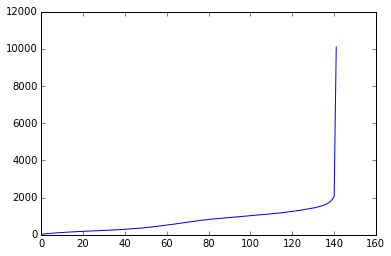

In [8]:
%matplotlib inline
from matplotlib import pyplot as pl
pl.plot(buckets)
pl.show()

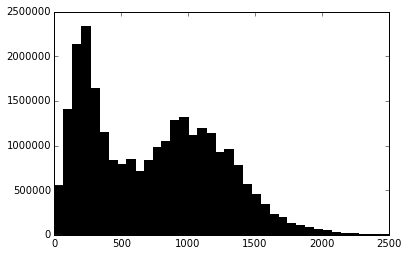

In [9]:
pl.hist(prices, num_buckets, color='black')
pl.xlim([0, 2500])
pl.show()

In [10]:
bucket_counts = [0 for __ in xrange(int(num_buckets) + 1)]
bucket_ranges = zip(xrange(int(num_buckets) + 1), buckets, buckets[1:])
print len(prices)
for i_, price in enumerate(prices):
    for i, low, high in bucket_ranges:
        if low <= price <= high:
            bucket_counts[i] += 1
            break
    if bucket_ranges[0][-1] < price:
        bucket_ranges = bucket_ranges[1:]
        print 'adjusting range', bucket_ranges[0]

26454134
adjusting range (1, 42.18, 54.600000000000001)
adjusting range (2, 54.600000000000001, 65.359999999999999)
adjusting range (3, 65.359999999999999, 75.280000000000001)
adjusting range (4, 75.280000000000001, 84.540000000000006)
adjusting range (5, 84.540000000000006, 93.620000000000005)
adjusting range (6, 93.620000000000005, 101.38)
adjusting range (7, 101.38, 109.23)
adjusting range (8, 109.23, 117.3)
adjusting range (9, 117.3, 124.98)
adjusting range (10, 124.98, 132.22)
adjusting range (11, 132.22, 139.58000000000001)
adjusting range (12, 139.58000000000001, 145.97999999999999)
adjusting range (13, 145.97999999999999, 151.97999999999999)
adjusting range (14, 151.97999999999999, 158.28999999999999)
adjusting range (15, 158.28999999999999, 163.84999999999999)
adjusting range (16, 163.84999999999999, 169.80000000000001)
adjusting range (17, 169.80000000000001, 174.24000000000001)
adjusting range (18, 174.24000000000001, 179.97999999999999)
adjusting range (19, 179.979999999999

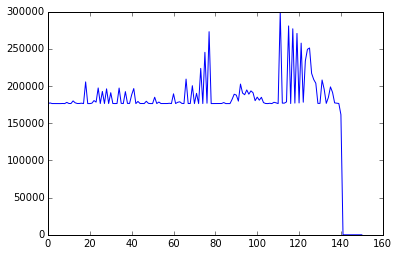

In [11]:
%matplotlib inline
pl.plot(bucket_counts)
pl.show()

In [12]:
num_bins = 150
out, bins = pandas.qcut(prices, num_bins, retbins=True)

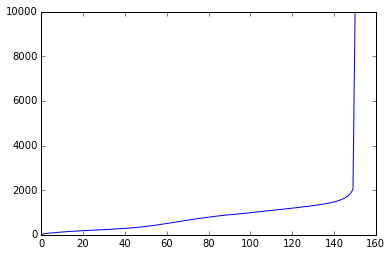

In [ ]:
%matplotlib inline
pl.plot(bins)
pl.show()

In [ ]:
bin_counts = [0 for __ in xrange(int(num_bins) + 1)]
bin_ranges = zip(xrange(int(num_bins) + 1), bins, bins[1:])
print len(prices)
for i_, price in enumerate(prices):
    for i, low, high in bin_ranges:
        if low < price <= high:
            bin_counts[i] += 1
            break
    if bin_ranges[0][-1] < price:
        bin_ranges = bin_ranges[1:]
        print 'adjusting range', bin_ranges[0]

26454134
adjusting range (1, 42.18, 54.600000000000001)
adjusting range (2, 54.600000000000001, 65.290000000000006)
adjusting range (3, 65.290000000000006, 75.230000000000004)
adjusting range (4, 75.230000000000004, 84.480000000000004)
adjusting range (5, 84.480000000000004, 93.569999999999993)
adjusting range (6, 93.569999999999993, 101.31999999999999)
adjusting range (7, 101.31999999999999, 109.17)
adjusting range (8, 109.17, 117.23999999999999)
adjusting range (9, 117.23999999999999, 124.98)
adjusting range (10, 124.98, 132.05000000000001)
adjusting range (11, 132.05000000000001, 139.41)
adjusting range (12, 139.41, 145.96000000000001)
adjusting range (13, 145.96000000000001, 151.88)
adjusting range (14, 151.88, 157.97999999999999)
adjusting range (15, 157.97999999999999, 163.44)
adjusting range (16, 163.44, 169.41)
adjusting range (17, 169.41, 173.97999999999999)
adjusting range (18, 173.97999999999999, 179.97999999999999)
adjusting range (19, 179.97999999999999, 183.97999999999999

In [ ]:
%matplotlib inline
pl.plot(bin_counts)
pl.show()

I think bucket_counts looks better than bin_counts.

In [ ]:
print buckets

In [ ]:
len(buckets)

In [ ]:
step = 1 / 142.
print step
bucket_ranges = zip(buckets, buckets[1:])
def convert(num):
    cumsum = 0
    for low, high in bucket_ranges:
        if cumsum <= num < cumsum + step:
            t = (num - cumsum) / step
            return (1 - t) * low + t * high
        cumsum += step
    t = (num - (cumsum - step)) / step
    return (1 - t) * low + t * high

In [ ]:
print convert(.992)
print convert(.9925)
print convert(.993)
print convert(.9935)

In [ ]:
%matplotlib inline
pl.plot([convert(i / 250.) for i in xrange(250)])
pl.xlim([0, 200])
pl.ylim([0, 1800])
pl.show()

In [ ]:
training_data['OUTBOUND_DATE'] = training_data['OUTBOUND_DATE'].astype('datetime64')

In [ ]:
training_data['INBOUND_DATE'] = training_data['INBOUND_DATE'].astype('datetime64')

In [ ]:
training_data['SEARCH_DATEHOUR'] = training_data['SEARCH_DATEHOUR'].astype('datetime64[ns]')

In [ ]:
training_data['SEARCH_TO_OUTBOUND'] = training_data.OUTBOUND_DATE - training_data.SEARCH_DATEHOUR

In [ ]:
training_data['SEARCH_TO_INBOUND'] = training_data.INBOUND_DATE - training_data.SEARCH_DATEHOUR

In [ ]:
training_data['OUTBOUND_TO_INBOUND'] = training_data.INBOUND_DATE - training_data.OUTBOUND_DATE

In [ ]:
airports_data = pandas.read_csv(airports_fname)

In [ ]:
training_merged = pandas.merge(training_data, airports_data, left_on='ORIGIN', right_on='AIRPORT')
del training_data

In [ ]:
del training_merged['AIRPORT']
training_merged.head()

In [ ]:
for key in ('CITY', 'COUNTRY', 'CONTINENT', 'LATITUDE', 'LONGITUDE', 'TRAFFIC'):
    training_merged['ORIGIN_' + key] = training_merged[key]
    del training_merged[key]

In [ ]:
training_merged = pandas.merge(training_merged, airports_data, left_on='DESTINATION', right_on='AIRPORT')
del training_merged['AIRPORT']
for key in ('CITY', 'COUNTRY', 'CONTINENT', 'LATITUDE', 'LONGITUDE', 'TRAFFIC'):
    training_merged['DESTINATION_' + key] = training_merged[key]
    del training_merged[key]
training_merged.head()

In [ ]:
training_merged = training_merged.sort('PRICE')

In [ ]:
training_merged.to_hdf('my_data/TrainingMerged.h5', 'fixed')

In [ ]:
for key in (
    'ORIGIN', 'DESTINATION', 'ORIGIN_CITY', 'ORIGIN_COUNTRY', 
    'ORIGIN_CONTINENT', 'DESTINATION_CITY', 'DESTINATION_COUNTRY', 
    'DESTINATION_CONTINENT',
):
    training_merged[key] = training_merged[key].astype('category')
training_merged.head()

In [ ]:
training_merged.info()

In [ ]:
training_merged.to_pickle('my_data/TrainingMerged.pickle')

In [ ]:
try:
    training_merged
except NameError:
    training_merged = pandas.from_pickle('my_data/TrainingMerged.pickle')
sample = training_merged.sample(100)

In [ ]:
sample.to_csv('my_data/TrainingMerged.Sample.100.csv')

In [ ]:
markets = training_merged.MARKETS
markets_set = set()
for __, marketlist in markets.iteritems():
    markets_set.update(marketlist.split(';'))
print len(markets_set)

In [ ]:
from collections import Counter
market_counts = Counter(
    market
    for __, marketlist in 
    markets.iteritems()
    for market in
    marketlist.split(';')
)
print market_counts.most_common(10)

In [ ]:
market_counts

In [ ]:
len(market_counts)

In [ ]:
most_common_markets = [market for market, __ in market_counts.most_common(199)]
print most_common_markets

In [ ]:
market_onehots = []
for i, marketlist in enumerate(markets):
    onehot = np.zeros(200, dtype='bool')
    ms = marketlist.split(';')
    for m in ms:
        try:
            onehot[most_common_markets.index(m)] = True
        except ValueError:
            onehot[-1] = True
    market_onehots.append(onehot)
    if not i % 1000000:
        print i

In [ ]:
training_merged.MARKETS.tail(2)

In [ ]:
sum(market_onehots[-1])

In [ ]:
sum(market_onehots[-2])

In [ ]:
training_merged['MARKETS'] = market_onehots

In [ ]:
training_merged.MARKETS.head()

In [ ]:
training_merged.dtypes

In [ ]:
origin_counts = Counter(training_merged.ORIGIN)
print len(origin_counts)
most_common_origins = [origin for origin, __ in origin_counts.most_common(499)]
mcos = frozenset(most_common_origins)
print sum(place not in mcos for place in training_merged.ORIGIN) / float(len(training_merged.ORIGIN))

In [ ]:
destination_counts = Counter(training_merged.DESTINATION)
print len(destination_counts)
most_common_destinations = [dest for dest, __ in destination_counts.most_common(499)]
mcds = frozenset(most_common_destinations)
print sum(place not in mcds for place in training_merged.DESTINATION) / float(len(training_merged.DESTINATION))

In [ ]:
origin_city_counts = Counter(training_merged.ORIGIN_CITY)
print len(origin_city_counts)
most_common_origin_cities = [orig for orig, __ in origin_city_counts.most_common(499)]
mcoss = frozenset(most_common_origin_cities)
print sum(place not in mcoss for place in training_merged.ORIGIN_CITY) / float(len(training_merged.ORIGIN_CITY))

In [ ]:
origin_country_counts = Counter(training_merged.ORIGIN_COUNTRY)
print len(origin_country_counts)
most_common_origin_countries = [orig for orig, __ in origin_country_counts.most_common(49)]
mcocs = frozenset(most_common_origin_countries)
print sum(place not in mcocs for place in training_merged.ORIGIN_COUNTRY) / float(len(training_merged.ORIGIN_COUNTRY))

In [ ]:
origin_continent_counts = Counter(training_merged.ORIGIN_CONTINENT)
print len(origin_continent_counts)
most_common_origin_continents = [orig for orig, __ in origin_continent_counts.most_common(6)]
mcoconts = frozenset(most_common_origin_continents)
print sum(place not in mcoconts for place in training_merged.ORIGIN_CONTINENT) / float(len(training_merged.ORIGIN_CONTINENT))

In [ ]:
destination_city_counts = Counter(training_merged.DESTINATION_CITY)
print len(destination_city_counts)
most_common_destination_cities = [dest for dest, __ in destination_city_counts.most_common(499)]
mcdss = frozenset(most_common_destination_cities)
print sum(place not in mcdss for place in training_merged.DESTINATION_CITY) / float(len(training_merged.DESTINATION_CITY))

In [ ]:
destination_country_counts = Counter(training_merged.DESTINATION_COUNTRY)
print len(destination_country_counts)
most_common_destination_countries = [dest for dest, __ in destination_country_counts.most_common(99)]
mcdcs = frozenset(most_common_destination_countries)
print sum(place not in mcdcs for place in training_merged.DESTINATION_COUNTRY) / float(len(training_merged.DESTINATION_COUNTRY))

In [ ]:
most_common_continents = most_common_origin_continents

Doesn't seem like we need to rescale traffics based on distributions

In [ ]:
one_day = 1000000000 * 60 * 60 * 24
oti_days = training_merged.OUTBOUND_TO_INBOUND.map(lambda x: x.item() / one_day)

In [ ]:
oti_days.hist()

In [ ]:
oti_days.sample(1000).hist()

In [ ]:
oti_out, oti_bins = pandas.qcut(oti_days, 10, retbins=True)

In [ ]:
oti_bins

In [ ]:
oti_out

In [ ]:
oti_out.sample(500).value_counts(sort=False)

In [ ]:
one_day = 1000000000 * 60 * 60 * 24
sto_days = training_merged.SEARCH_TO_OUTBOUND.map(lambda x: x.item() / one_day)
sto_days.hist()

In [ ]:
sto_out, sto_bins = pandas.qcut(sto_days, 10, retbins=True)
sto_bins

In [ ]:
sto_out.sample(500).value_counts(sort=False)